<a href="https://colab.research.google.com/github/Ngcebz30/Data-Analytics-Playground/blob/main/Analyzing_New_York_Real_Estate_Prices_and_Neighborhood_Trends_A_Data_driven_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving NY Realstate Pricing.csv to NY Realstate Pricing.csv


In [4]:
df = pd.read_csv('NY Realstate Pricing.csv')

In [5]:
df.head()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [6]:
df.dtypes

F1                         int64
id                         int64
neighbourhood             object
latitude                 float64
longitude                float64
room_type                 object
price                      int64
days_occupied_in_2019      int64
minimum_nights             int64
number_of_reviews          int64
reviews_per_month        float64
availability_2020          int64
dtype: object

In [7]:
df.shape

(17614, 12)

In [8]:
df.isnull().sum()

F1                       0
id                       0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2019    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2020        0
dtype: int64

In [9]:
df = df.dropna()

In [11]:
df['days_occupied_in_2019'] = df['days_occupied_in_2019'].astype(int)


In [12]:
df['availability_2020'] = df['availability_2020'].astype(int)

In [13]:
df.describe()

,F1,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
count,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,18547.564664,1.572032e+07,40.726755,-73.947732,145.455490,179.517656,7.392926,56.128988,1.607060,154.154763
std,11000.717341,9.644155e+06,0.056981,0.050213,194.990677,130.202015,19.233869,65.972370,1.635528,138.079651
min,0.000000,2.595000e+03,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,8192.250000,6.718288e+06,40.686042,-73.980938,70.000000,35.000000,2.000000,9.000000,0.340000,8.000000
50%,19496.500000,1.654699e+07,40.720540,-73.953050,109.000000,198.000000,3.000000,33.000000,1.060000,125.000000
75%,28686.750000,2.407707e+07,40.763127,-73.930682,170.000000,301.000000,5.000000,79.000000,2.460000,309.000000
max,35596.000000,3.056528e+07,40.908040,-73.721790,9999.000000,364.000000,1125.000000,675.000000,19.250000,365.000000


<function matplotlib.pyplot.show(close=None, block=None)>

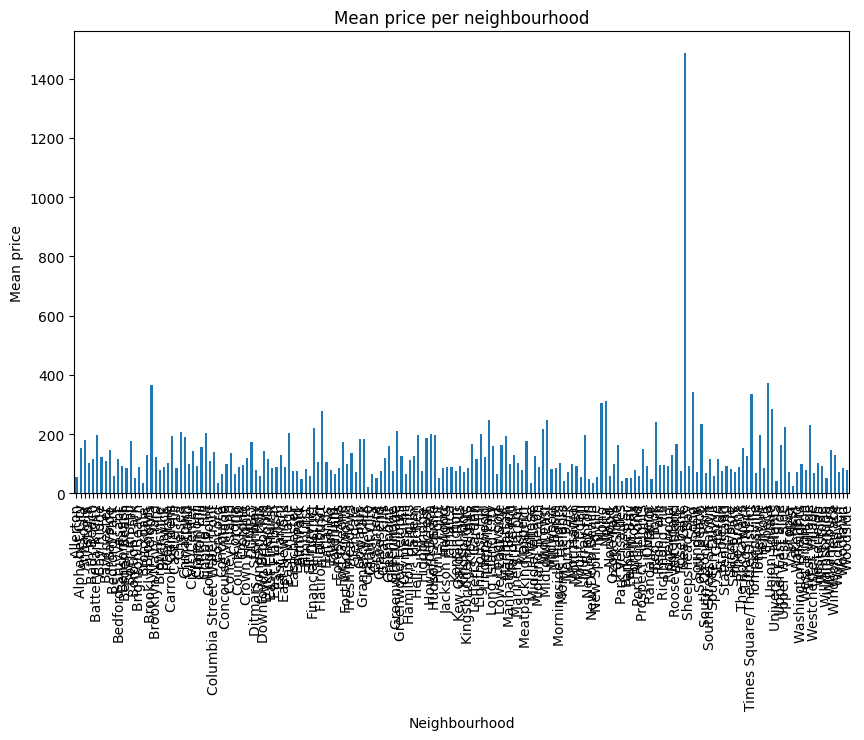

In [14]:
mean_price = df.groupby('neighbourhood')['price'].mean()
mean_price.plot(kind='bar', figsize=(10, 6))
plt.title('Mean price per neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price')
plt.show

In [15]:
correlation = df.corr()
correlation

<ipython-input-15-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,F1,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
F1,1.000000,0.999616,-0.026900,0.107143,-0.044315,0.222421,-0.066931,-0.335309,0.130897,-0.141492
id,0.999616,1.000000,-0.027029,0.107367,-0.044438,0.222119,-0.067032,-0.334889,0.130388,-0.141505
latitude,-0.026900,-0.027029,1.000000,0.088307,0.032412,0.015671,0.043032,-0.006944,-0.020467,-0.019465
longitude,0.107143,0.107367,0.088307,1.000000,-0.160400,-0.063585,-0.077714,0.046117,0.129257,0.065265
price,-0.044315,-0.044438,0.032412,-0.160400,1.000000,-0.044186,0.027088,-0.069971,-0.094442,0.036388
days_occupied_in_2019,0.222421,0.222119,0.015671,-0.063585,-0.044186,1.000000,-0.107419,-0.097414,-0.000978,-0.690022
minimum_nights,-0.066931,-0.067032,0.043032,-0.077714,0.027088,-0.107419,1.000000,-0.164502,-0.203744,0.110711
number_of_reviews,-0.335309,-0.334889,-0.006944,0.046117,-0.069971,-0.097414,-0.164502,1.000000,0.754916,-0.000268
reviews_per_month,0.130897,0.130388,-0.020467,0.129257,-0.094442,-0.000978,-0.203744,0.754916,1.000000,-0.046048
availability_2020,-0.141492,-0.141505,-0.019465,0.065265,0.036388,-0.690022,0.110711,-0.000268,-0.046048,1.000000


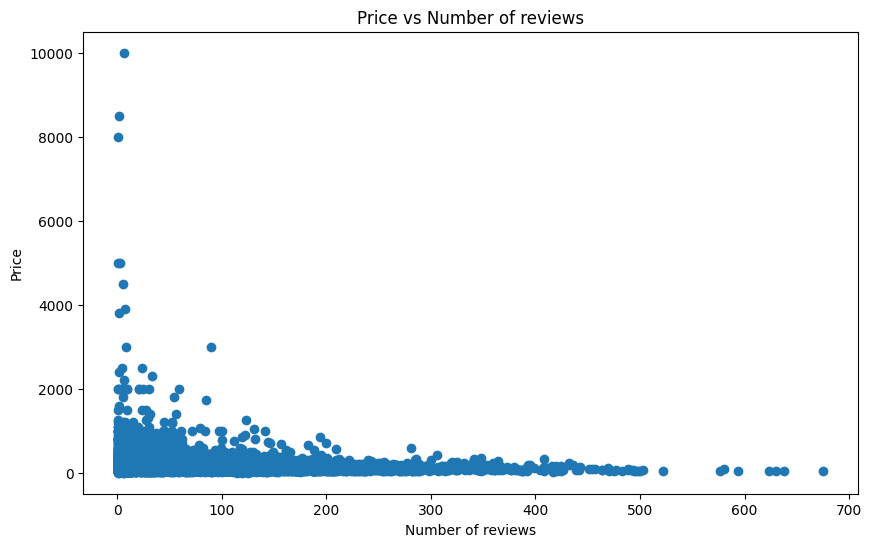

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['price'])
plt.title('Price vs Number of reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.show()

In [18]:
import seaborn as sns 

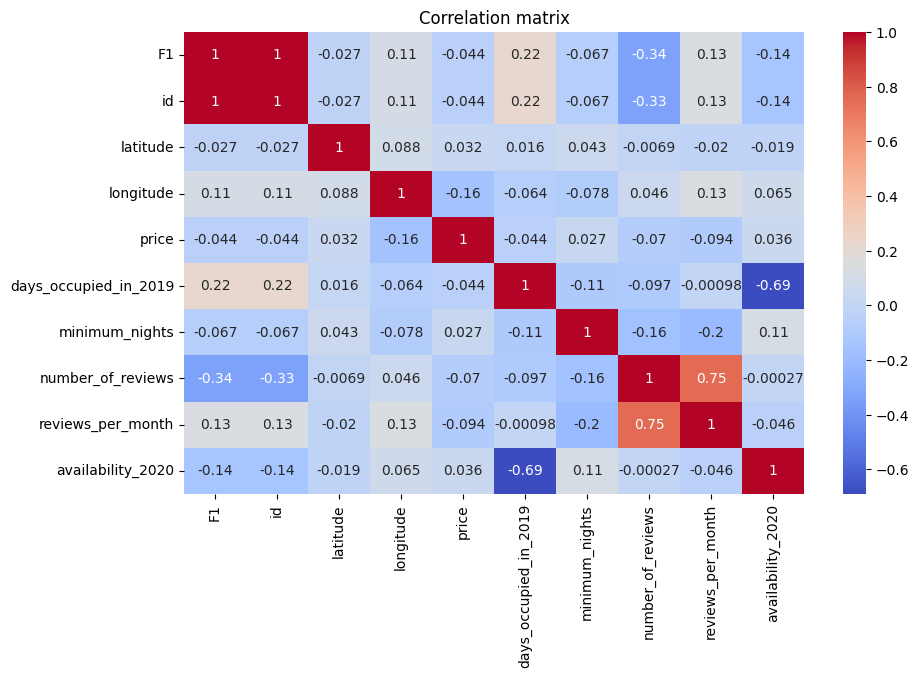

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
df.to_csv('NY Realstate Pricing, index=False')